In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=df4f0bec080fc365c7f98cea17c54484dd2371a2ab6ea0cc7a6c50891828222c
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"virenkathiriya","key":"e40971a8871ea734bcd6672d5a46ca7d"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 73% 30.0M/41.0M [00:00<00:00, 122MB/s]
100% 41.0M/41.0M [00:00<00:00, 136MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('./fake-and-real-news-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
import zipfile
with zipfile.ZipFile('./Fake.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    import zipfile
with zipfile.ZipFile('./True.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

covid=pd.read_csv('COVID19FN.csv')    

In [ ]:
fake=pd.read_csv('Fake.csv')
category=['FALSE']*(23481)
fake['Category']=category
fake.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FALSE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FALSE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FALSE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FALSE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FALSE


In [ ]:
true=pd.read_csv('True.csv')
category=['TRUE']*(21417)
true['Category']=category
true.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [ ]:
# tot=true.head(5000).append(fake.head(5000),ignore_index=True)
tot=covid
df=tot
df.head()

,Unnamed: 0,Title,Text,country,Label,URL,len_sentences,source,text,date,avg_word_len
0,0,A video shows a fortune teller predicting the...,Circulating on social networks a video that sh...,Portugal,False,https://observador.pt/factchecks/fact-check-um...,83,https://observador.pt,circulating on social networks video that show...,08-04-2020,4.795181
1,1,Internet sensation and the worldâ€™s cutest ba...,Internet sensation and the world’s cutest baby...,India,False,https://www.newschecker.in/article/news-detail...,516,https://www.newschecker.in,internet sensation and the world cutest baby a...,17-04-2020,4.858527
2,2,A video has been viewed hundreds of thousands ...,A video has been viewed hundreds of thousands ...,Indonesia,False,https://factcheck.afp.com/video-shows-us-presi...,570,https://factcheck.afp.com,a video has been viewed hundreds of thousands ...,09-04-2020,5.010526
3,3,"Treasury is depositing Kshs 45, 000 to the mob...",A Facebook post claiming that the National Tre...,Kenya,False,https://pesacheck.org/false-treasury-is-not-se...,551,https://pesacheck.org,a facebook post claiming that the national tre...,11-04-2020,5.377495
4,4,Hunagrian authorities are capturing men 50 or ...,Moves on Facebook and Twitter a video showing ...,Mexico,False,https://www.animalpolitico.com/elsabueso/hungr...,368,https://www.animalpolitico.com,moves on facebook and twitter video showing po...,11-04-2020,5.032609


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.reset_index().index

RangeIndex(start=0, stop=2821, step=1)

In [ ]:
df['index']=df.reset_index().index

In [ ]:
df

,Unnamed: 0,Title,Text,country,Label,URL,len_sentences,source,text,date,avg_word_len,index
1681,1756,Pakistan confirms first coronavirus case in Ka...,Pakistan confirms first coronavirus case in Ka...,Pakistan,True,http://www.aaj.tv/english/national/pakistan-co...,7,http://www.aaj.tv,pakistan confirms first coronavirus case in ka...,13-02-2020,6.428571,0
1043,1095,"China asks for permission to kill 20,000 infec...",The story flew around the Internet as the deat...,India,False,https://www.boomlive.in/fake-news/false-china-...,526,https://www.boomlive.in,the story flew around the internet as the deat...,08-02-2020,4.899240,1
424,444,A herd of deer reclaimed the Ooty-Coimbatore ...,"Amid the scare of the novel coronavirus, a pic...",India,False,https://www.newschecker.in/article/news-detail...,356,https://www.newschecker.in,amid the scare of the novel coronavirus pictur...,24-03-2020,4.727528,2
409,428,Did Kennedy Center give DNC $5 million after g...,"For example, Facebook user Tim Boyer slammed t...",United States,False,https://leadstories.com/hoax-alert/2020/03/Fac...,322,https://leadstories.com,for example facebook user tim boyer slammed th...,27-03-2020,4.916149,3
307,322,Whether countries with high rates of childhoo...,"As this coronavirus is ""novel,"" that means it ...",United States,False,https://leadstories.com/hoax-alert/2020/03/fac...,453,https://leadstories.com,as this coronavirus is novel that means it is ...,27-03-2020,5.172185,4
...,...,...,...,...,...,...,...,...,...,...,...,...
985,1035,"Lombardia, Italy, asks Cuba, China and Venezu...",A wheel provided press by the regional Ministe...,Venezuela,False,https://efectococuyo.com/cocuyo-chequea/italia...,819,https://efectococuyo.com,a wheel provided press by the regional ministe...,17-02-2020,5.321123,2816
247,261,An â€śopen letterâ€ť purportedly written by U...,The 14-part letter states the novel coronaviru...,Hong Kong,False,https://factcheck.afp.com/gates-foundation-urg...,459,https://factcheck.afp.com,the part letter states the novel coronavirus p...,27-03-2020,5.141612,2817
1876,1953,"United States markets join global rout, sharp ...","United States, United States - Stocks around t...",United States,True,https://www.afghanistannews.net/news/263845801...,259,https://www.afghanistannews.net,united states united states stocks around the ...,03-03-2020,4.613900,2818
623,651,Pedro SĂˇnchez has a medical team of 14 people...,As stated in the text of the BOE it was in 199...,Spain,False,https://www.newtral.es/coronavirus-moncloa-14-...,228,https://www.newtral.es,as stated in the text of the boe it was in whe...,17-02-2020,5.100877,2819


In [ ]:
def empath_feature_calc(text):
    try:
        return lexicon.analyze(text,normalize=True)
    except:
        return None

df['empath_features'] = df['text'].apply(empath_feature_calc)

In [ ]:
text_analysis=df['empath_features'].iloc[1]
print(text_analysis)
print(df.Label.shape)
print(df.shape)
print(df.empath_features)

{'help': 0.0, 'office': 0.0019011406844106464, 'dance': 0.0, 'money': 0.0, 'wedding': 0.0019011406844106464, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.011406844106463879, 'cold': 0.0, 'hate': 0.0019011406844106464, 'cheerfulness': 0.0, 'aggression': 0.0038022813688212928, 'occupation': 0.0, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.005703422053231939, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0019011406844106464, 'health': 0.0076045627376425855, 'pride': 0.0, 'dispute': 0.015209125475285171, 'nervousness': 0.0, 'government': 0.0076045627376425855, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.0, 'suffering': 0.005703422053231939, 'royalty': 0.0019011406844106464, 'wealthy': 0.0, 'tourism': 0.0019011406844106464, 'furniture': 0.0, 'school': 0.0019011406844106464, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.017110266159695818, 'morning': 0.0019011406844106464, 'banking': 0.0, 'social_media': 0.01520912547528

In [ ]:
newDF = pd.DataFrame(columns = list(df.empath_features[0].keys()))
# print(newDF.head())
exclude_idx = []
for i in range(df.shape[0]):
    dict_new_dataframe = df.empath_features[i]
    try:
        new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
        header_new_dataframe = new_df.iloc[0]  # 0th index is header
        new_df = new_df[1:]  # fetch data except header
        new_df.columns = header_new_dataframe #set header as dataframe header in pandas
        newDF = newDF.append(new_df, ignore_index=True) # populate new dataframe with new data
    except:
        exclude_idx.append(i)
        pass

# print(df.shape)
# print(df.Category.shape)
# print(newDF.shape) # 194 categories converted into attributes for each row present in original dataset..

In [ ]:
newDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0.0120482,0,...,0,0,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928
1,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,0,0,0,0,0,0.0116279,0,0,0.00193798,0,0,0,0,0,0,...,0,0.00193798,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078
2,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,0.00701754,0,0,0,0,0,0.00175439,0,0,0,0.00526316,0,0,0.00175439,0.00350877,...,0,0.00175439,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614
3,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,0.0399274,0.00181488,0,0,0.00181488,0,0.0108893,0.0108893,0.00725953,0,0.0108893,0,0.00181488,0.00725953,0,...,0.00362976,0,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0
4,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,0.0271739,0,0,0,0,0,0,0,0.00815217,0,0,0,0,0.00271739,0,...,0,0.00815217,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,...,0,0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2810,0,0.0229885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0114943,0,0.0114943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0114943,0,0,0,0,0,0,0,0,0,0,0.0114943,0,0,0,0,0,0,0,0,0,0.0114943,0,0.0114943,0,0,0,0,0,0,0.0114943,0,0,0,0.0114943,0,0,0,0.0114943,0
2811,0,0,0.0196078,0,0,0.0196078,0,0,0,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0,0,0,0,0.0784314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0.0196078,0,0,0,0,0,0.0196078,0.0196078,0,0.0196078,0,0.0588235,0,0,0,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0
2812,0,0,0,0,0,0,0,0.030303,0,0.030303,0,0.030303,0,0,0,0,0,0.030303,0,0,0.030303,0.030303,0,0,0,0.030303,0.030303,0,0,0,0.0606061,0,0,0,0,0,0,0,0,0,...,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.0606061,0,0,0,0,0.0606061,0,0.030303,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.Label.shape)
category_in_original_dataframe=df.Label
print(len(category_in_original_dataframe))
for idx in exclude_idx:
  if(idx in category_in_original_dataframe):
    category_in_original_dataframe.pop(idx)
print(category_in_original_dataframe)  # 10 indexes removed..
newDF['Label']=category_in_original_dataframe
print(newDF.shape)

(2814,)
2814
1681     True
1043    False
424     False
409     False
307     False
        ...  
985     False
247     False
1876     True
623     False
341     False
Name: Label, Length: 2814, dtype: bool
(2814, 195)


In [ ]:
latestDF = newDF.dropna()  ## Remove rows with value NAN
print(latestDF.shape)

latest = list(latestDF.Label)
trueCategory = ['HALF TRUE','TRUE', 'True', 'PARTLY TRUE','Half True','Partly true','Partially true','Mostly True','MOSTLY TRUE']
falseCategory = ['misleading',  'Mostly false', 'False',  'FALSE', 'Explanatory', 'Correct', 'MOSTLY FALSE', 'Unlikely',
                'No evidence', 'PARTLY FALSE', 'Mainly false', 'No Evidence', 'Misleading',
               'false and misleading', 'Conspiracy theory', 'Mostly False', 'Partly false', 'Fake',
               'Misleading/False',  'Pants on Fire!', 'MISLEADING', 'Partially false', 'Not true',
               "(Org. doesn't apply rating)"]

allot=[]
for val in latest:
  if val in trueCategory:
    allot.append('TRUE')
  else:
    allot.append('FALSE')

print(allot)
print(len(allot))

(2807, 195)
['FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE

In [ ]:
latestDF['latestCategory']=allot
latestDF

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Label,latestCategory
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0,0,0,0,0,0,0,0.0120482,0,0,0,0.0120482,0,...,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928,False,FALSE
1,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,0,0,0,0,0,0.0116279,0,0,0.00193798,0,0,0,0,0,0,...,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078,False,FALSE
2,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,0.00701754,0,0,0,0,0,0.00175439,0,0,0,0.00526316,0,0,0.00175439,0.00350877,...,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614,False,FALSE
3,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,0.0399274,0.00181488,0,0,0.00181488,0,0.0108893,0.0108893,0.00725953,0,0.0108893,0,0.00181488,0.00725953,0,...,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0,False,FALSE
4,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,0.0271739,0,0,0,0,0,0,0,0.00815217,0,0,0,0,0.00271739,0,...,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217,False,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,...,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,FALSE
2810,0,0.0229885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0114943,0,0.0114943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0114943,0,0,0,0,0,0,0,0,0,0.0114943,0,0.0114943,0,0,0,0,0,0,0.0114943,0,0,0,0.0114943,0,0,0,0.0114943,0,True,FALSE
2811,0,0,0.0196078,0,0,0.0196078,0,0,0,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0,0,0,0,0.0784314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0196078,0,0,0,0.0196078,0,0,0,0,0,0.0196078,0.0196078,0,0.0196078,0,0.0588235,0,0,0,0,0,0,0,0,0,0,0,0.0196078,0,0,0,0,True,FALSE
2812,0,0,0,0,0,0,0,0.030303,0,0.030303,0,0.030303,0,0,0,0,0,0.030303,0,0,0.030303,0.030303,0,0,0,0.030303,0.030303,0,0,0,0.0606061,0,0,0,0,0,0,0,0,0,...,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.0606061,0,0,0,0,0.0606061,0,0.030303,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,True,FALSE


In [ ]:
deceptive_news=latestDF[latestDF["latestCategory"]=='FALSE']
print(deceptive_news)

0           help      office       dance  ...    musical  Label latestCategory
0              0           0           0  ...  0.0481928  False          FALSE
1     0.00193798  0.00387597           0  ...  0.0310078  False          FALSE
2              0  0.00877193  0.00175439  ...  0.0245614  False          FALSE
3      0.0127042  0.00907441           0  ...          0  False          FALSE
4              0  0.00543478           0  ...  0.0190217  False          FALSE
...          ...         ...         ...  ...        ...    ...            ...
2809           0           0           0  ...          0   True          FALSE
2810           0   0.0229885           0  ...          0   True          FALSE
2811           0           0   0.0196078  ...          0   True          FALSE
2812           0           0           0  ...          0   True          FALSE
2813           0   0.0425532           0  ...          0   True          FALSE

[2807 rows x 196 columns]


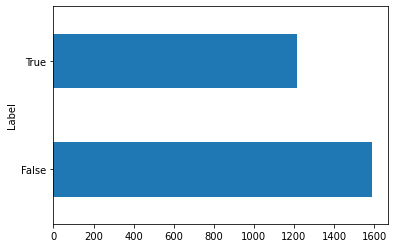

In [ ]:
latestDF.groupby(['Label']).size().plot(kind='barh')

Text Summ

In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time.time()
df = df.dropna()
tfidf = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.decomposition import NMF
n_topics = 15
nmf = NMF(n_components=n_topics,random_state=0)
topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['water', 'disease', 'symptoms', 'evidence', 'sars'],
 1: ['video', 'youtube', 'search', 'shows', 'shared'],
 2: ['united', 'states', 'trump', 'president', 'pandemic'],
 3: ['cases', 'confirmed', 'deaths', 'death', 'reported'],
 4: ['points', 'india', 'stocks', 'markets', 'close'],
 5: ['post', 'claim', 'photo', 'shared', 'novel'],
 6: ['australia', 'south', 'tested', 'confirmed', 'open'],
 7: ['article', 'fact', 'content', 'information', 'ministry'],
 8: ['hospital', 'patients', 'medical', 'test', 'hospitals'],
 9: ['panic', 'person', 'stop', 'told', 'patients'],
 10: ['outbreak', 'deadly', 'amid', 'spread', 'countries'],
 11: ['chinese', 'city', 'february', 'year', 'reported'],
 12: ['suspected', 'government', 'state', 'measures', 'public'],
 13: ['police', 'taken', 'man', 'masks', 'home'],
 14: ['vaccine', 'testing', 'cure', 'company', 'test']}

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

In [ ]:
t = pipe.transform(df['text']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0,15)])
t.head()

,"['water', 'disease', 'symptoms', 'evidence', 'sars']","['video', 'youtube', 'search', 'shows', 'shared']","['united', 'states', 'trump', 'president', 'pandemic']","['cases', 'confirmed', 'deaths', 'death', 'reported']","['points', 'india', 'stocks', 'markets', 'close']","['post', 'claim', 'photo', 'shared', 'novel']","['australia', 'south', 'tested', 'confirmed', 'open']","['article', 'fact', 'content', 'information', 'ministry']","['hospital', 'patients', 'medical', 'test', 'hospitals']","['panic', 'person', 'stop', 'told', 'patients']","['outbreak', 'deadly', 'amid', 'spread', 'countries']","['chinese', 'city', 'february', 'year', 'reported']","['suspected', 'government', 'state', 'measures', 'public']","['police', 'taken', 'man', 'masks', 'home']","['vaccine', 'testing', 'cure', 'company', 'test']"
0,0.000000,0.00000,0.000000,0.031641,0.000000,0.000000,0.004178,0.032379,0.020500,0.000000,0.000000,0.000000,0.015320,0.00000,0.000000
1,0.000000,0.00000,0.010559,0.001751,0.003795,0.036541,0.000000,0.119116,0.023096,0.002440,0.058512,0.060243,0.000000,0.00000,0.001954
2,0.000000,0.06919,0.000000,0.000000,0.019481,0.062005,0.000000,0.073568,0.000000,0.001305,0.005598,0.000000,0.000000,0.00005,0.016950
3,0.000000,0.00000,0.039132,0.008345,0.007247,0.069422,0.000000,0.038342,0.003924,0.004151,0.003810,0.016775,0.043426,0.00000,0.002395
4,0.017616,0.00000,0.101334,0.072357,0.033604,0.038487,0.019801,0.006886,0.012297,0.000000,0.001038,0.010701,0.000000,0.00000,0.048959


In [ ]:
t

,"['water', 'disease', 'symptoms', 'evidence', 'sars']","['video', 'youtube', 'search', 'shows', 'shared']","['united', 'states', 'trump', 'president', 'pandemic']","['cases', 'confirmed', 'deaths', 'death', 'reported']","['points', 'india', 'stocks', 'markets', 'close']","['post', 'claim', 'photo', 'shared', 'novel']","['australia', 'south', 'tested', 'confirmed', 'open']","['article', 'fact', 'content', 'information', 'ministry']","['hospital', 'patients', 'medical', 'test', 'hospitals']","['panic', 'person', 'stop', 'told', 'patients']","['outbreak', 'deadly', 'amid', 'spread', 'countries']","['chinese', 'city', 'february', 'year', 'reported']","['suspected', 'government', 'state', 'measures', 'public']","['police', 'taken', 'man', 'masks', 'home']","['vaccine', 'testing', 'cure', 'company', 'test']"
0,0.000000,0.000000,0.000000,0.031641,0.000000,0.000000,0.004178,0.032379,0.020500,0.000000,0.000000,0.000000,0.015320,0.000000,0.000000
1,0.000000,0.000000,0.010559,0.001751,0.003795,0.036541,0.000000,0.119116,0.023096,0.002440,0.058512,0.060243,0.000000,0.000000,0.001954
2,0.000000,0.069190,0.000000,0.000000,0.019481,0.062005,0.000000,0.073568,0.000000,0.001305,0.005598,0.000000,0.000000,0.000050,0.016950
3,0.000000,0.000000,0.039132,0.008345,0.007247,0.069422,0.000000,0.038342,0.003924,0.004151,0.003810,0.016775,0.043426,0.000000,0.002395
4,0.017616,0.000000,0.101334,0.072357,0.033604,0.038487,0.019801,0.006886,0.012297,0.000000,0.001038,0.010701,0.000000,0.000000,0.048959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.023736,0.017469,0.013668,0.017739,0.002426,0.004711,0.000000,0.085023,0.028540,0.007691,0.000000,0.082500,0.045258,0.000000,0.001794
2809,0.000000,0.000000,0.001111,0.000000,0.000000,0.105789,0.003491,0.070338,0.000000,0.005794,0.000000,0.116241,0.000000,0.000000,0.000000
2810,0.000000,0.000000,0.063224,0.000000,0.226034,0.000000,0.049278,0.000000,0.000000,0.000000,0.000000,0.039823,0.000000,0.000000,0.000000
2811,0.032138,0.000000,0.018511,0.000000,0.000000,0.001457,0.002177,0.045318,0.061290,0.000000,0.000000,0.000000,0.035307,0.000000,0.000000


In [ ]:
merged=pd.concat([t, latestDF], axis=1)

In [ ]:
merged = merged.dropna()
merged

,"['water', 'disease', 'symptoms', 'evidence', 'sars']","['video', 'youtube', 'search', 'shows', 'shared']","['united', 'states', 'trump', 'president', 'pandemic']","['cases', 'confirmed', 'deaths', 'death', 'reported']","['points', 'india', 'stocks', 'markets', 'close']","['post', 'claim', 'photo', 'shared', 'novel']","['australia', 'south', 'tested', 'confirmed', 'open']","['article', 'fact', 'content', 'information', 'ministry']","['hospital', 'patients', 'medical', 'test', 'hospitals']","['panic', 'person', 'stop', 'told', 'patients']","['outbreak', 'deadly', 'amid', 'spread', 'countries']","['chinese', 'city', 'february', 'year', 'reported']","['suspected', 'government', 'state', 'measures', 'public']","['police', 'taken', 'man', 'masks', 'home']","['vaccine', 'testing', 'cure', 'company', 'test']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Label
0,0.000000,0.000000,0.000000,0.031641,0.000000,0.000000,0.004178,0.032379,0.020500,0.000000,0.000000,0.000000,0.015320,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,...,0,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928,False
1,0.000000,0.000000,0.010559,0.001751,0.003795,0.036541,0.000000,0.119116,0.023096,0.002440,0.058512,0.060243,0.000000,0.000000,0.001954,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,...,0.00193798,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078,False
2,0.000000,0.069190,0.000000,0.000000,0.019481,0.062005,0.000000,0.073568,0.000000,0.001305,0.005598,0.000000,0.000000,0.000050,0.016950,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,...,0.00175439,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614,False
3,0.000000,0.000000,0.039132,0.008345,0.007247,0.069422,0.000000,0.038342,0.003924,0.004151,0.003810,0.016775,0.043426,0.000000,0.002395,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,...,0,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0,False
4,0.017616,0.000000,0.101334,0.072357,0.033604,0.038487,0.019801,0.006886,0.012297,0.000000,0.001038,0.010701,0.000000,0.000000,0.048959,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,...,0.00815217,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
import time
def test_models(models,X_train, X_test, y_train, y_test):
    start = time.time()
    score=[]
    acc=[]
    for model_name in models:
        model=model_name
        model.fit(X_train,y_train)
        y_test_hat=model.predict(X_test)
        ac=accuracy_score(y_test_hat,y_test)
        cm=confusion_matrix(y_test, y_test_hat)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        model_score=round(model.score(X_test, y_test), 2) 
        score.append(model_score)
        acc.append(ACC)

        print('%s Overall accuracy:' % model_name, ACC)
        end = time.time()
        print('Execution Time:', end-start)
    print("Corresponsing models used:-",models)
    print("F1Score is :",score)
    print("Accuracy is:",acc)

In [ ]:
merged.drop('Label', axis='columns', inplace=True)

In [ ]:
merged

,"['water', 'disease', 'symptoms', 'evidence', 'sars']","['video', 'youtube', 'search', 'shows', 'shared']","['united', 'states', 'trump', 'president', 'pandemic']","['cases', 'confirmed', 'deaths', 'death', 'reported']","['points', 'india', 'stocks', 'markets', 'close']","['post', 'claim', 'photo', 'shared', 'novel']","['australia', 'south', 'tested', 'confirmed', 'open']","['article', 'fact', 'content', 'information', 'ministry']","['hospital', 'patients', 'medical', 'test', 'hospitals']","['panic', 'person', 'stop', 'told', 'patients']","['outbreak', 'deadly', 'amid', 'spread', 'countries']","['chinese', 'city', 'february', 'year', 'reported']","['suspected', 'government', 'state', 'measures', 'public']","['police', 'taken', 'man', 'masks', 'home']","['vaccine', 'testing', 'cure', 'company', 'test']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Label
0,0.000000,0.000000,0.000000,0.031641,0.000000,0.000000,0.004178,0.032379,0.020500,0.000000,0.000000,0.000000,0.015320,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,...,0,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928,False
1,0.000000,0.000000,0.010559,0.001751,0.003795,0.036541,0.000000,0.119116,0.023096,0.002440,0.058512,0.060243,0.000000,0.000000,0.001954,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,...,0.00193798,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078,False
2,0.000000,0.069190,0.000000,0.000000,0.019481,0.062005,0.000000,0.073568,0.000000,0.001305,0.005598,0.000000,0.000000,0.000050,0.016950,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,...,0.00175439,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614,False
3,0.000000,0.000000,0.039132,0.008345,0.007247,0.069422,0.000000,0.038342,0.003924,0.004151,0.003810,0.016775,0.043426,0.000000,0.002395,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,...,0,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0,False
4,0.017616,0.000000,0.101334,0.072357,0.033604,0.038487,0.019801,0.006886,0.012297,0.000000,0.001038,0.010701,0.000000,0.000000,0.048959,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,...,0.00815217,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# merged['Label']=allot[:-1]

In [ ]:
merged

,"['water', 'disease', 'symptoms', 'evidence', 'sars']","['video', 'youtube', 'search', 'shows', 'shared']","['united', 'states', 'trump', 'president', 'pandemic']","['cases', 'confirmed', 'deaths', 'death', 'reported']","['points', 'india', 'stocks', 'markets', 'close']","['post', 'claim', 'photo', 'shared', 'novel']","['australia', 'south', 'tested', 'confirmed', 'open']","['article', 'fact', 'content', 'information', 'ministry']","['hospital', 'patients', 'medical', 'test', 'hospitals']","['panic', 'person', 'stop', 'told', 'patients']","['outbreak', 'deadly', 'amid', 'spread', 'countries']","['chinese', 'city', 'february', 'year', 'reported']","['suspected', 'government', 'state', 'measures', 'public']","['police', 'taken', 'man', 'masks', 'home']","['vaccine', 'testing', 'cure', 'company', 'test']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Label
0,0.000000,0.000000,0.000000,0.031641,0.000000,0.000000,0.004178,0.032379,0.020500,0.000000,0.000000,0.000000,0.015320,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0120482,0,...,0,0.0120482,0,0,0,0,0,0.0240964,0,0,0,0,0,0.0120482,0,0,0,0,0.0120482,0,0.060241,0,0,0,0,0,0,0,0.0240964,0,0.0240964,0,0,0,0,0.0120482,0,0,0.0481928,FALSE
1,0.000000,0.000000,0.010559,0.001751,0.003795,0.036541,0.000000,0.119116,0.023096,0.002440,0.058512,0.060243,0.000000,0.000000,0.001954,0.00193798,0.00387597,0,0,0,0.00193798,0,0.00581395,0,0.0116279,0,0.00193798,0,0,0,0.0135659,0.00581395,0,0,0,0,0.00968992,0,0.00387597,0,...,0.00193798,0.0193798,0,0.00775194,0,0,0,0,0,0,0,0.0116279,0,0.0116279,0,0,0,0,0.00581395,0,0.0523256,0,0,0.0290698,0,0,0,0,0.0271318,0,0.0426357,0,0,0.00193798,0.0135659,0.00387597,0,0,0.0310078,FALSE
2,0.000000,0.069190,0.000000,0.000000,0.019481,0.062005,0.000000,0.073568,0.000000,0.001305,0.005598,0.000000,0.000000,0.000050,0.016950,0,0.00877193,0.00175439,0,0.00877193,0.00350877,0.00175439,0.00350877,0,0,0,0,0.0122807,0,0,0.00175439,0,0,0,0,0,0.00350877,0.00175439,0,0,...,0.00175439,0.00350877,0,0,0.00175439,0,0,0.0122807,0,0,0,0,0,0,0,0,0.00526316,0,0.00175439,0,0.0280702,0,0.00701754,0,0,0.00175439,0,0,0,0,0,0,0,0.0157895,0,0.00350877,0,0,0.0245614,FALSE
3,0.000000,0.000000,0.039132,0.008345,0.007247,0.069422,0.000000,0.038342,0.003924,0.004151,0.003810,0.016775,0.043426,0.000000,0.002395,0.0127042,0.00907441,0,0.0290381,0.00362976,0.00181488,0,0.00181488,0.00181488,0,0,0,0.00181488,0,0,0.00544465,0.00544465,0.00181488,0,0,0,0,0,0.0145191,0,...,0,0.0145191,0,0.00362976,0,0,0,0.00362976,0.00181488,0,0.00181488,0.0108893,0,0,0,0,0,0.0163339,0.00181488,0.00181488,0.00725953,0,0.0145191,0.00181488,0.0235935,0,0,0.00181488,0,0,0,0,0.00181488,0.0127042,0,0,0.00544465,0,0,FALSE
4,0.017616,0.000000,0.101334,0.072357,0.033604,0.038487,0.019801,0.006886,0.012297,0.000000,0.001038,0.010701,0.000000,0.000000,0.048959,0,0.00543478,0,0,0,0,0,0.00271739,0,0,0,0.013587,0,0,0,0.00271739,0.00271739,0.0108696,0,0,0.00271739,0,0,0.00271739,0,...,0.00815217,0,0,0,0.0108696,0.00271739,0.00543478,0,0.00815217,0,0,0,0,0,0,0,0,0.00271739,0.00543478,0,0.0217391,0,0.0271739,0.00271739,0,0,0,0,0,0.00271739,0.00271739,0,0,0,0,0.00271739,0,0,0.0190217,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
columns=merged.columns[:-1]

x=merged[columns]
y=merged['Label']
y=y.astype('int')
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2808    1
2809    1
2810    1
2811    1
2812    1
Name: Label, Length: 2806, dtype: int64


In [ ]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
extraTree=ExtraTreesClassifier()
naive=GaussianNB()
lda=LinearDiscriminantAnalysis()
clf = SVC(kernel='linear')
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors = 3) 
knn4 = KNeighborsClassifier(n_neighbors = 4) 
gbc = GradientBoostingClassifier(random_state=0)
regressor = RandomForestClassifier(n_estimators = 100)
bagging=BaggingClassifier()

models=[]
models.append(lr)
models.append(dt)
models.append(naive)
models.append(lda)
models.append(clf)
models.append(knn2)
models.append(knn3)
models.append(knn4)
models.append(gbc)
models.append(regressor)
models.append(bagging)
models.append(extraTree)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

test_models(models,X_train, X_test, y_train, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Overall accuracy: [0.75771971 0.75771971]
Execution Time: 0.12240457534790039
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') Overall accuracy: [0.88598575 0.88598575]
Execution Time: 0.4001288414001465
GaussianNB(priors=None, var_smoothing=1e-09) Overall accuracy: [0.77078385 0.77078385]
Execu